In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA

In [3]:
train_df = pd.read_csv("sample_data/california_housing_train.csv")
test_df = pd.read_csv("sample_data/california_housing_test.csv")

In [4]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
test_df.head()

In [5]:
all_features = list(train_df.columns)
target_feature = ["median_house_value"]

all_features.remove(target_feature[0])
X_feature = ["median_income"]

In [6]:
train_X, train_y = train_df[X_feature].values, train_df[target_feature].values
test_X, test_y = test_df[X_feature].values, test_df[target_feature].values

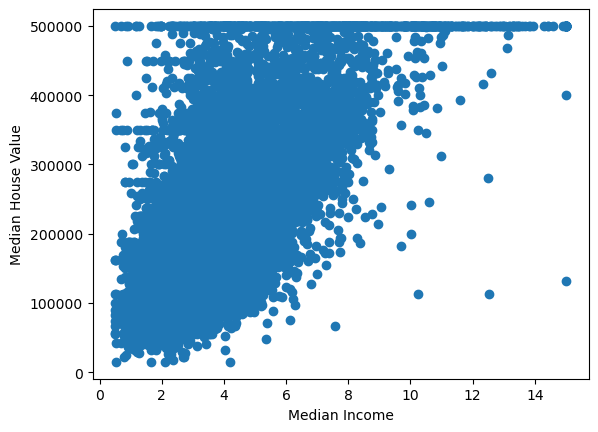

In [7]:
plt.scatter(train_X, train_y)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [8]:
def linear_regression(X, W, b):
  return X.dot(W) + b

In [9]:
train_x_mean = train_X.mean(axis=0, keepdims=True)
train_x_sdev = train_X.std(axis=0, keepdims=True)

train_X_norm = (train_X - train_x_mean) / train_x_sdev
test_X_norm = (test_X - train_x_mean) / train_x_sdev

In [10]:
Weights = np.zeros((len(X_feature), 1))
Biases = 0

In [11]:
def loss(Y_true, Y_pred):
  loss = np.abs(Y_true - Y_pred)
  return np.mean(loss)

In [12]:
def get_param_update(X, y_true, y_pred, W, b, lr=0.01):
    dW = -np.sum(2 * (X.T.dot(y_true - y_pred)), axis=1, keepdims=True) / len(X)
    db = -2 * np.mean(y_true - y_pred)
    new_W = W - lr * dW
    new_b = b - lr * db
    return new_W, new_b

In [13]:
steps = 1000
tol = 0.1
prev_loss = np.inf
loss_through_time = []
test_loss_through_time = []
Weights_through_time = [Weights]
Biases_through_time = [Biases]
for step in range(steps):
    pred = linear_regression(train_X_norm, Weights, Biases)
    step_loss = loss(train_y, pred)
    test_pred = linear_regression(test_X_norm, Weights, Biases)
    test_loss = loss(test_y, test_pred)
    Weights, Biases = get_param_update(train_X_norm, train_y, pred, Weights, Biases)
    # print(f"{step + 1}. Loss = {step_loss}")
    loss_through_time.append(step_loss)
    test_loss_through_time.append(test_loss)
    Weights_through_time.append(Weights)
    Biases_through_time.append(Biases)
    if np.abs(prev_loss - step_loss) < tol:
        break
    else:
        prev_loss = step_loss

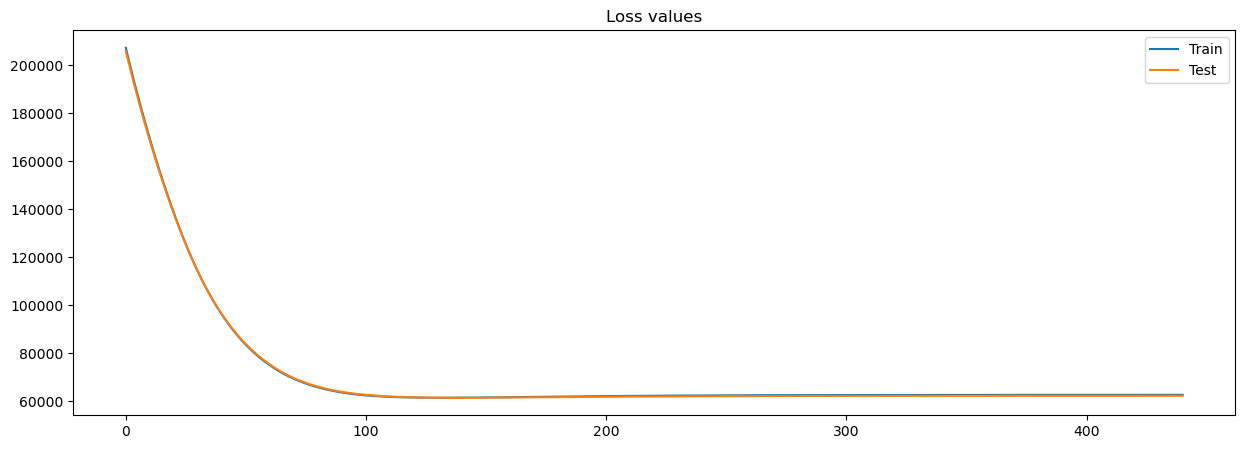

In [14]:
from os import name
plt.figure(figsize=(15, 5))
plt.plot(loss_through_time, label='Train')
plt.plot(test_loss_through_time, label='Test')
plt.title('Loss values')
plt.legend()
plt.show()

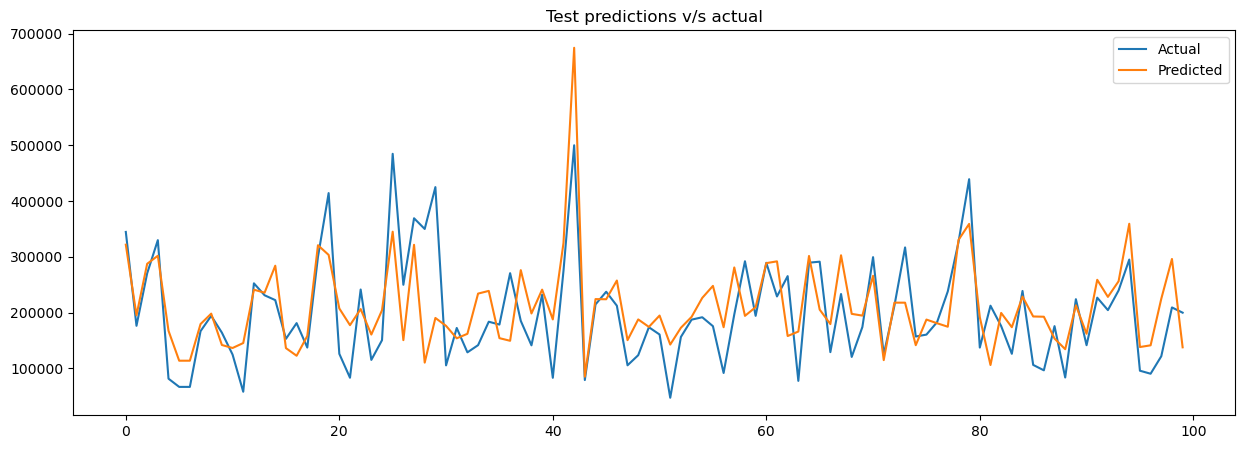

In [15]:
test_pred = linear_regression(test_X_norm, Weights, Biases)
plt.figure(figsize=(15, 5))
plt.plot(test_y[: 100], label='Actual')
plt.plot(test_pred[: 100], label='Predicted')
plt.legend()
plt.title('Test predictions v/s actual')
plt.show()

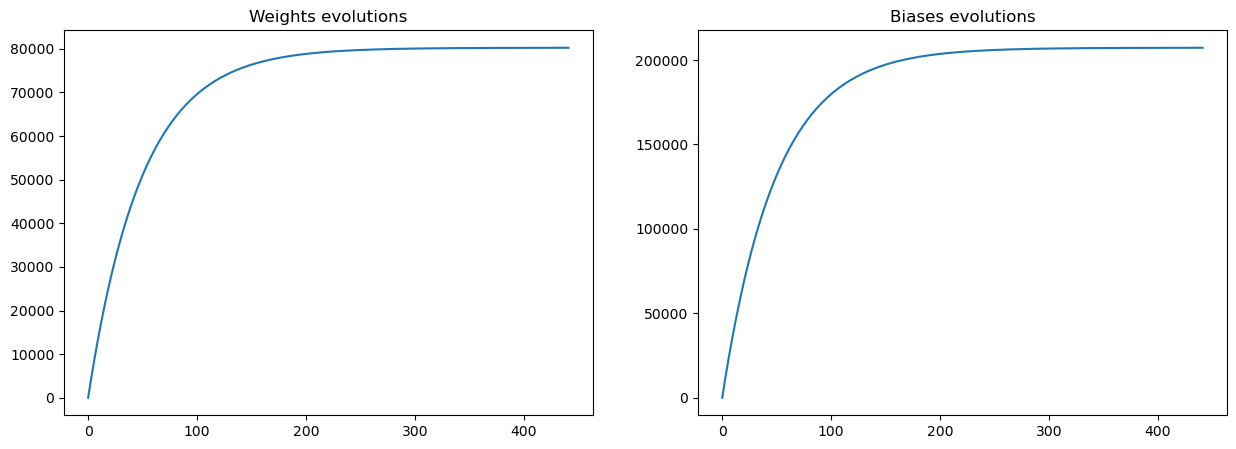

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(np.squeeze(Weights_through_time))
plt.title('Weights evolutions')

plt.subplot(122)
plt.plot(Biases_through_time)
plt.title('Biases evolutions')
plt.show()

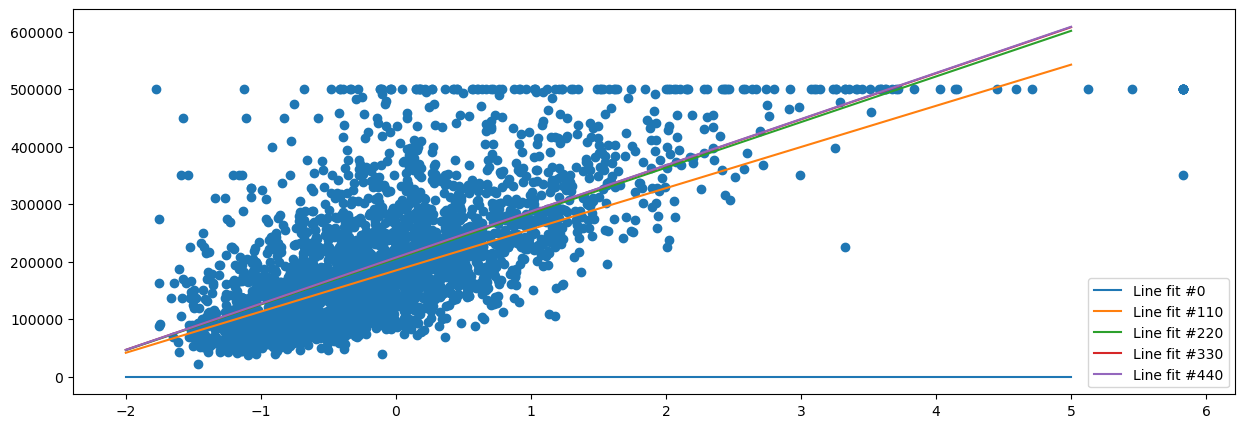

In [17]:
num_lines = 4
plt.figure(figsize=(15, 5))
plt.scatter(test_X_norm, test_y)
for ind in range(0, len(Weights_through_time), len(Weights_through_time)//num_lines):
  plt.plot(np.arange(-2, 6), 
           linear_regression(np.arange(-2, 6).reshape((-1, 1)), 
                             Weights_through_time[ind], 
                             Biases_through_time[ind]), 
           label=f"Line fit #{ind}")
plt.legend()
plt.show()